In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#load the dataset
vid = pd.read_csv("/content/drive/My Drive/video/Training.csv")
#show the data
vid.head()

,name,ori_file,size,bitrate,size_diff,bitrate_diff,sizediff/ori,bitratediff/ori,Condition,Cls
0,0GHpTnbnTZs_1100kbps_0001.mp4,0GHpTnbnTZs,36.4,1381,11.9,321,0.246377,0.188602,1100,0
1,0GHpTnbnTZs_1100kbps_001.mp4,0GHpTnbnTZs,37.3,1414,11.0,288,0.227743,0.169213,1100,0
2,0GHpTnbnTZs_1100kbps_0025.mp4,0GHpTnbnTZs,37.5,1419,10.8,283,0.223602,0.166275,1100,0
3,0GHpTnbnTZs_1100kbps_005.mp4,0GHpTnbnTZs,38.0,1440,10.3,262,0.213251,0.153937,1100,0
4,0GHpTnbnTZs_1100kbps_01.mp4,0GHpTnbnTZs,37.2,1411,11.1,291,0.229814,0.170975,1100,0


In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split as split
train, test = split(vid, test_size = 0.20)
print (train.shape)
print (test.shape)

(288, 10)
(72, 10)


In [ ]:
from keras.utils import np_utils
X_train = train[['size','bitrate','size_diff', 'bitrate_diff']]
y_train = train.Cls
X_test = test[['size','bitrate','size_diff', 'bitrate_diff']]
y_test = test.Cls

In [ ]:
#network construction
from keras.models import Sequential
from keras.layers.core import Dense,Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import CSVLogger

model = Sequential()
model.add(Dense(12, input_dim=4,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='RMSProp',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#training roughly
from keras.callbacks import ModelCheckpoint

checkpoint = [
    ModelCheckpoint('model_best.hdf5',
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)
]
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[checkpoint],epochs=250, batch_size=3)

Epoch 1/250
87/96 [==========================>...] - ETA: 0s - loss: 10.4839 - accuracy: 0.1303
Epoch 00001: val_accuracy improved from -inf to 0.18056, saving model to model_best.hdf5
96/96 [==============================] - 0s 4ms/step - loss: 9.8891 - accuracy: 0.1319 - val_loss: 3.3691 - val_accuracy: 0.1806
Epoch 2/250
95/96 [============================>.] - ETA: 0s - loss: 3.1137 - accuracy: 0.1088
Epoch 00002: val_accuracy did not improve from 0.18056
96/96 [==============================] - 0s 3ms/step - loss: 3.1092 - accuracy: 0.1076 - val_loss: 2.2902 - val_accuracy: 0.1250
Epoch 3/250
79/96 [=======================>......] - ETA: 0s - loss: 2.4973 - accuracy: 0.1688
Epoch 00003: val_accuracy did not improve from 0.18056
96/96 [==============================] - 0s 3ms/step - loss: 2.4870 - accuracy: 0.1562 - val_loss: 2.3907 - val_accuracy: 0.1389
Epoch 4/250
83/96 [========================>.....] - ETA: 0s - loss: 2.3323 - accuracy: 0.1165
Epoch 00004: val_accuracy did not

In [ ]:
#training carefully
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

stop = EarlyStopping(monitor='val_accuracy',  patience=70, verbose=0, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=25, verbose=1,
    factor=0.5,
    min_lr = 0.00001,
    cooldown=0
)
checkpoint = [ModelCheckpoint('model_best.hdf5',monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)
]
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[checkpoint,reduce_lr,stop],epochs=500, batch_size=3)

Epoch 1/500
96/96 [==============================] - ETA: 0s - loss: 0.6863 - accuracy: 0.7535
Epoch 00001: val_accuracy improved from -inf to 0.75000, saving model to model_best.hdf5
96/96 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.7535 - val_loss: 0.9487 - val_accuracy: 0.7500
Epoch 2/500
90/96 [===========================>..] - ETA: 0s - loss: 0.7712 - accuracy: 0.7333
Epoch 00002: val_accuracy did not improve from 0.75000
96/96 [==============================] - 0s 3ms/step - loss: 0.7893 - accuracy: 0.7326 - val_loss: 0.8018 - val_accuracy: 0.7361
Epoch 3/500
91/96 [===========================>..] - ETA: 0s - loss: 0.6309 - accuracy: 0.7912
Epoch 00003: val_accuracy did not improve from 0.75000
96/96 [==============================] - 0s 3ms/step - loss: 0.6297 - accuracy: 0.7882 - val_loss: 1.2463 - val_accuracy: 0.7500
Epoch 4/500
95/96 [============================>.] - ETA: 0s - loss: 0.7321 - accuracy: 0.7474
Epoch 00004: val_accuracy did not 

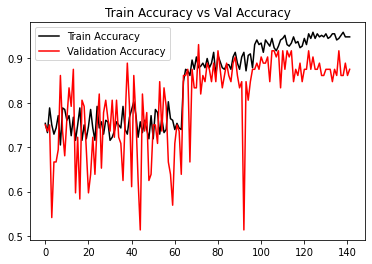

In [ ]:
#plot learning curve
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(hist.history['accuracy'], label='Train Accuracy', color='black')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.show()

In [ ]:
x = vid[['size','bitrate','size_diff', 'bitrate_diff']]
y = vid.Cls

In [ ]:
#predict
model.load_weights('model_best.hdf5')
model.compile(optimizer='RMSprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
pr = model.predict(x, batch_size=3, verbose=0, steps=None)

In [ ]:
pp = pr.argmax(axis=1)

In [ ]:
yp = []
for i in pp:
  yp.append(1100+i*100)

In [ ]:
print(len(yp))

360


In [ ]:
yt = []
for i in y:
  yt.append(1100+i*100)

In [ ]:
print(yt)

[1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 150

In [ ]:
#load prediction data
issue = pd.read_csv("/content/received.csv")

In [ ]:
issue.head()

,name,FileSize,BitRate,size_diff,B_diff
0,0.mp4,33.9,1388,7.3,168
1,1.mp4,35.2,1441,6.0,115
2,2.mp4,36.0,1473,5.2,83
3,3.mp4,35.9,1469,5.3,87
4,4.mp4,36.0,1473,5.2,83


In [ ]:
X_issue = issue[['FileSize','BitRate','size_diff', 'B_diff']]

In [ ]:
pr = model.predict(X_issue, batch_size=3, verbose=0, steps=None)

In [ ]:
pp = pr.argmax(axis=1)

In [ ]:
pp

array([1, 2, 2, 2, 2, 0, 1, 4, 5, 2])

In [ ]:
yp = []
for i in pp:
  yp.append(1100+i*100)
yp

[1200, 1300, 1300, 1300, 1300, 1100, 1200, 1500, 1600, 1300]